In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob

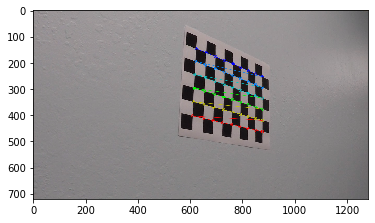

In [18]:
# prepare object points
nx = 9
ny = 6

objpoints =[]
imgpoints  = []
objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] =np.mgrid[0:9, 0:6].T.reshape(-1,2)


# Get list of calibarion images
fnames = glob.glob('camera_cal/*.jpg')

for fname in fnames:
    
    # Read image
    img = cv2.imread(fname)

    # Convert image to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # Check if corners are found
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        #Draw corners on the original image
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)

In [19]:
# Calibrate camera
img = cv2.imread('camera_cal/calibration1.jpg')
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
print(mtx)

[[1.15777818e+03 0.00000000e+00 6.67113857e+02]
 [0.00000000e+00 1.15282217e+03 3.86124583e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


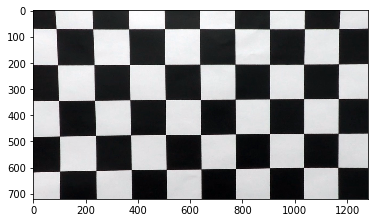

In [21]:
undistort = cv2.undistort(img, mtx, dist, None, mtx)

plt.imshow(undistort)